In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
import seaborn as sas

In [94]:
# import dataset and shuffle data
df = pd.read_csv('dataset_2.csv')
df = df.sample(frac=1).reset_index(drop=True)
df['Head Pressure'] = df['Head Pressure'].div(500)
df['Hip Bone Pressure'] = df['Hip Bone Pressure'].div(500)
df['Legs Pressure'] = df['Legs Pressure'].div(500)
df


,Head X,Head Y,Head Pressure,Hip Bone X,Hip Bone Y,Hip Bone Pressure,Legs X,Legs Y,Legs Pressure,Subject,Position
0,8.043478,8.956522,0.220526,6.585366,22.951220,0.365797,10.333333,46.561404,0.202213,3,1
1,19.109091,8.709091,0.099780,17.486111,27.541667,0.181036,21.000000,56.000000,1.000000,0,0
2,18.115385,9.564103,0.093970,15.986111,29.083333,0.205682,13.914286,48.771429,0.102217,3,0
3,20.650000,9.575000,0.148751,22.177419,25.806452,0.370979,23.933333,54.200000,0.253809,11,2
4,23.191489,10.574468,0.132281,23.091954,24.988506,0.152938,24.393443,46.721311,0.074768,6,2
...,...,...,...,...,...,...,...,...,...,...,...
2667,18.000000,3.200000,0.181452,17.000000,21.500000,0.813456,7.500000,50.000000,0.004688,5,0
2668,18.095238,7.809524,0.408712,21.153846,24.320513,0.281983,11.780488,43.353659,0.062024,5,1
2669,17.200000,10.237500,0.239648,17.925743,25.178218,0.356716,15.514563,46.077670,0.177929,1,0
2670,13.391304,9.760870,0.192488,14.209677,24.508065,0.218232,13.958333,46.302083,0.173940,3,1


In [95]:
# Split dataset in train, val and test
num_col = len(df.columns)
#train_split = 900
#test_split = 1050
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    
    print(test_subject.shape[1])


13


In [96]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 9)
(2400, 1)
(2400, 1)
(200, 9)
(200, 1)
(200, 1)


[19.10909091  8.70909091  0.0997801  17.48611111 27.54166667  0.18103614
 21.         56.          1.        ]
[18.11538462  9.56410256  0.09397039 15.98611111 29.08333333  0.20568241
 13.91428571 48.77142857  0.1022168 ]
[20.65        9.575       0.14875082 22.17741935 25.80645161  0.37097898
 23.93333333 54.2         0.25380926]
[23.19148936 10.57446809  0.13228127 23.09195402 24.98850575  0.15293776
 24.39344262 46.72131148  0.07476764]
[22.27777778 11.77777778  0.57311207 22.69072165 25.49484536  0.29596406
 26.8245614  42.85964912  0.28606871]


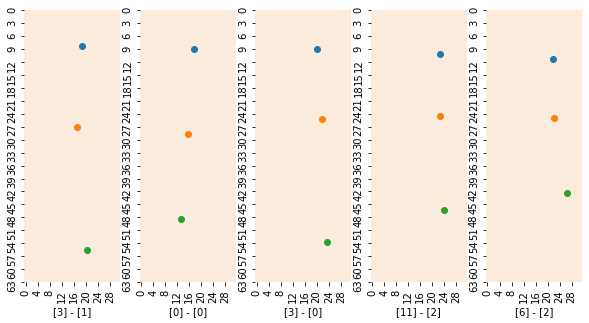

In [97]:
plt.figure(figsize=(10,5))
i = 0


for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    sas.heatmap(np.zeros(2048).reshape(64,32),  vmin=-2, cbar=False)
    plt.plot(train_data[i][0],train_data[i][1], 'o')
    plt.plot(train_data[i][3],train_data[i][4], 'o')
    plt.plot(train_data[i][6],train_data[i][7], 'o')
    plt.xlabel(label)
    print(train_data[i])

In [98]:
# normalize data and build categorical labels

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [105]:
inp = 9

model_position = Sequential()
model_position.add(Dense(64, input_dim= inp, activation='relu'))
model_position.add(Flatten())
model_position.add(Dropout(0.4))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(16, activation='relu'))
model_position.add(Dense(9, activation='relu'))

model_position.add(Dense(3, activation='softmax'))

In [106]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_position.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 64)                640       
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_89 (Dense)             (None, 9)               

In [107]:
#train subject model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=250,  callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/250
2400/2400 [==============================] - 1s 249us/sample - loss: 1.1726 - acc: 0.4958 - val_loss: 0.9139 - val_acc: 0.6100
Epoch 2/250
2400/2400 [==============================] - 0s 65us/sample - loss: 0.9214 - acc: 0.5729 - val_loss: 0.7726 - val_acc: 0.7000
Epoch 3/250
2400/2400 [==============================] - 0s 67us/sample - loss: 0.8366 - acc: 0.6275 - val_loss: 0.6972 - val_acc: 0.7850
Epoch 4/250
2400/2400 [==============================] - 0s 66us/sample - loss: 0.7697 - acc: 0.6779 - val_loss: 0.6595 - val_acc: 0.8050
Epoch 5/250
2400/2400 [==============================] - 0s 62us/sample - loss: 0.7188 - acc: 0.7083 - val_loss: 0.6186 - val_acc: 0.8050
Epoch 6/250
2400/2400 [==============================] - 0s 69us/sample - loss: 0.6893 - acc: 0.7287 - val_loss: 0.6212 - val_acc: 0.8000
Epoch 7/250
2400/2400 [==============================] - 0s 98us/sample - loss: 0.6803 - acc: 0.7337 - val_loss: 0.5788 - va

2400/2400 [==============================] - 0s 77us/sample - loss: 0.2984 - acc: 0.8896 - val_loss: 0.2512 - val_acc: 0.9300
Epoch 60/250
2400/2400 [==============================] - 0s 88us/sample - loss: 0.2950 - acc: 0.8954 - val_loss: 0.2123 - val_acc: 0.9200
Epoch 61/250
2400/2400 [==============================] - 0s 81us/sample - loss: 0.2791 - acc: 0.9104 - val_loss: 0.1866 - val_acc: 0.9400
Epoch 62/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2812 - acc: 0.9058 - val_loss: 0.2674 - val_acc: 0.9050
Epoch 63/250
2400/2400 [==============================] - 0s 60us/sample - loss: 0.2982 - acc: 0.8983 - val_loss: 0.2475 - val_acc: 0.9100
Epoch 64/250
2400/2400 [==============================] - 0s 61us/sample - loss: 0.2899 - acc: 0.9013 - val_loss: 0.2061 - val_acc: 0.9350
Epoch 65/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2812 - acc: 0.8992 - val_loss: 0.2185 - val_acc: 0.9300
Epoch 66/250
2400/2400 [================

Epoch 118/250
2400/2400 [==============================] - 0s 68us/sample - loss: 0.2220 - acc: 0.9225 - val_loss: 0.2218 - val_acc: 0.9100
Epoch 119/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2259 - acc: 0.9175 - val_loss: 0.2025 - val_acc: 0.9250
Epoch 120/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2285 - acc: 0.9250 - val_loss: 0.1915 - val_acc: 0.9150
Epoch 121/250
2400/2400 [==============================] - 0s 63us/sample - loss: 0.2318 - acc: 0.9229 - val_loss: 0.2035 - val_acc: 0.9200
Epoch 122/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.2295 - acc: 0.9167 - val_loss: 0.2313 - val_acc: 0.9100
Epoch 123/250
2400/2400 [==============================] - 0s 65us/sample - loss: 0.2370 - acc: 0.9133 - val_loss: 0.1856 - val_acc: 0.9150
Epoch 124/250
2400/2400 [==============================] - 0s 63us/sample - loss: 0.2423 - acc: 0.9112 - val_loss: 0.1951 - val_acc: 0.9350
Epoch 125/250
2400/2

2400/2400 [==============================] - 0s 67us/sample - loss: 0.2078 - acc: 0.9296 - val_loss: 0.1910 - val_acc: 0.9250
Epoch 177/250
2400/2400 [==============================] - 0s 69us/sample - loss: 0.2049 - acc: 0.9337 - val_loss: 0.1847 - val_acc: 0.9200
Epoch 178/250
2400/2400 [==============================] - 0s 65us/sample - loss: 0.2022 - acc: 0.9262 - val_loss: 0.2779 - val_acc: 0.9000
Epoch 179/250
2400/2400 [==============================] - 0s 65us/sample - loss: 0.2024 - acc: 0.9321 - val_loss: 0.2373 - val_acc: 0.9100
Epoch 180/250
2400/2400 [==============================] - 0s 66us/sample - loss: 0.1879 - acc: 0.9367 - val_loss: 0.2109 - val_acc: 0.9150
Epoch 181/250
2400/2400 [==============================] - 0s 75us/sample - loss: 0.1935 - acc: 0.9333 - val_loss: 0.2044 - val_acc: 0.9300
Epoch 182/250
2400/2400 [==============================] - 0s 73us/sample - loss: 0.2054 - acc: 0.9287 - val_loss: 0.1866 - val_acc: 0.9350
Epoch 183/250
2400/2400 [=========

2400/2400 [==============================] - 0s 74us/sample - loss: 0.1901 - acc: 0.9358 - val_loss: 0.2348 - val_acc: 0.9150
Epoch 235/250
2400/2400 [==============================] - 0s 61us/sample - loss: 0.1797 - acc: 0.9404 - val_loss: 0.1665 - val_acc: 0.9400
Epoch 236/250
2400/2400 [==============================] - 0s 75us/sample - loss: 0.1668 - acc: 0.9438 - val_loss: 0.2125 - val_acc: 0.9300
Epoch 237/250
2400/2400 [==============================] - 0s 67us/sample - loss: 0.1747 - acc: 0.9379 - val_loss: 0.2078 - val_acc: 0.9300
Epoch 238/250
2400/2400 [==============================] - 0s 72us/sample - loss: 0.1831 - acc: 0.9350 - val_loss: 0.1637 - val_acc: 0.9400
Epoch 239/250
2400/2400 [==============================] - 0s 64us/sample - loss: 0.1887 - acc: 0.9354 - val_loss: 0.1803 - val_acc: 0.9350
Epoch 240/250
2400/2400 [==============================] - 0s 73us/sample - loss: 0.1918 - acc: 0.9337 - val_loss: 0.2688 - val_acc: 0.9350
Epoch 241/250
2400/2400 [=========

72/72 [==============================] - 0s 84us/sample - loss: 0.1872 - acc: 0.9583
[0 1 0 2 2 0 0 1 0 1 0 2 1 0 0 0 0 0 2 0 2 1 2 2 0 0 1 0 0 0 0 0 0 0 0 0 1
 2 1 2 2 0 1 1 0 1 2 1 0 0 1 0 2 0 0 1 2 1 1 2 2 1 2 0 1 0 1 0 1 0 1 0]


,Subject,Position
2600,5,0
2601,8,1
2602,12,0
2603,8,2
2604,4,2
2605,3,0
2606,4,0
2607,11,1
2608,10,0
2609,9,1


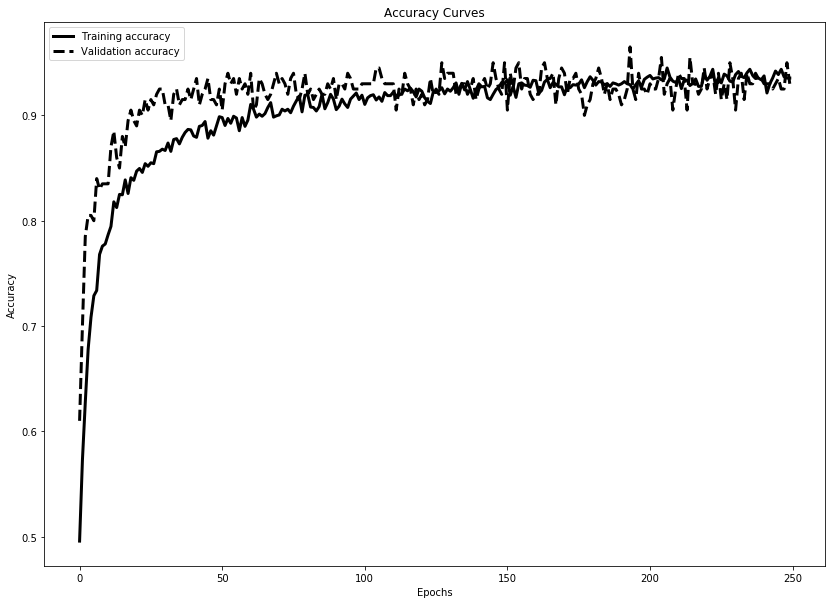

In [108]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


model_position.evaluate(test_data, test_position)

predictions_position = model_position.predict(test_data)
predictions_position = predictions_position.argmax(axis=-1)

print(predictions_position)
test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)

In [109]:
# Split dataset in train, val and test
num_col = len(df.columns)
#train_split = 900
#test_split = 1050
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, [2,5,8]]
val_data = df.iloc[train_split:test_split, [2,5,8]]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data = df.iloc[test_split:,[2,5,8]]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data = np.array(test_data)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

print(test_subject.shape[1])

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, [2,5,8]]
    val_data = df.iloc[train_split:test_split, [2,5,8]]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data = df.iloc[test_split:,[2,5,8]]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data = np.array(test_data)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    
    print(test_subject.shape[1])

13


In [110]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)


print(train_data[:10])
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)

#test_data = test_data / 500
#train_data = train_data / 500
#val_data = val_data / 500

[[0.22052564 0.36579723 0.20221266]
 [0.0997801  0.18103614 1.        ]
 [0.09397039 0.20568241 0.1022168 ]
 [0.14875082 0.37097898 0.25380926]
 [0.13228127 0.15293776 0.07476764]
 [0.57311207 0.29596406 0.28606871]
 [0.05839381 1.         0.00624592]
 [0.1070818  0.22727739 0.1712714 ]
 [0.1744146  0.26876911 0.28279114]
 [0.6499389  0.27324192 0.0085873 ]]
(2400, 1)
(2400, 1)
(200, 3)
(200, 1)
(200, 1)


In [111]:
# normalize data and build categorical labels

train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [113]:
model_subject = Sequential()
model_subject.add(Dense(128, input_dim= 3, activation='relu'))
model_subject.add(Flatten())
model_subject.add(Dropout(0.4))
model_subject.add(Dense(64, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(16, activation='relu'))
model_subject.add(Dense(9, activation='relu'))

model_subject.add(Dense(13, activation='softmax'))

In [114]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 128)               512       
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_102 (Dense)            (None, 16)              

In [115]:
#train position model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=700, batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/700
2400/2400 [==============================] - 1s 451us/sample - loss: 2.5592 - acc: 0.0733 - val_loss: 2.5537 - val_acc: 0.1000
Epoch 2/700
2400/2400 [==============================] - 1s 261us/sample - loss: 2.5317 - acc: 0.1042 - val_loss: 2.5405 - val_acc: 0.1350
Epoch 3/700
2400/2400 [==============================] - 1s 251us/sample - loss: 2.5077 - acc: 0.1292 - val_loss: 2.5208 - val_acc: 0.1300
Epoch 4/700
2400/2400 [==============================] - 1s 266us/sample - loss: 2.4876 - acc: 0.1329 - val_loss: 2.4951 - val_acc: 0.1450
Epoch 5/700
2400/2400 [==============================] - 1s 257us/sample - loss: 2.4672 - acc: 0.1367 - val_loss: 2.4846 - val_acc: 0.1450
Epoch 6/700
2400/2400 [==============================] - 1s 264us/sample - loss: 2.4576 - acc: 0.1379 - val_loss: 2.4742 - val_acc: 0.1300
Epoch 7/700
2400/2400 [==============================] - 1s 258us/sample - loss: 2.4481 - acc: 0.1429 - val_loss: 2.464

2400/2400 [==============================] - 1s 239us/sample - loss: 2.0136 - acc: 0.2767 - val_loss: 2.0635 - val_acc: 0.2650
Epoch 60/700
2400/2400 [==============================] - 1s 231us/sample - loss: 2.0056 - acc: 0.3033 - val_loss: 1.9974 - val_acc: 0.3150
Epoch 61/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.9910 - acc: 0.2962 - val_loss: 2.0641 - val_acc: 0.2800
Epoch 62/700
2400/2400 [==============================] - 1s 234us/sample - loss: 1.9802 - acc: 0.3054 - val_loss: 2.0685 - val_acc: 0.2500
Epoch 63/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.9766 - acc: 0.3008 - val_loss: 2.0262 - val_acc: 0.2900
Epoch 64/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.9750 - acc: 0.3058 - val_loss: 2.0205 - val_acc: 0.3000
Epoch 65/700
2400/2400 [==============================] - 1s 234us/sample - loss: 1.9530 - acc: 0.3017 - val_loss: 2.0055 - val_acc: 0.3000
Epoch 66/700
2400/2400 [=========

2400/2400 [==============================] - 1s 232us/sample - loss: 1.6785 - acc: 0.4075 - val_loss: 1.7465 - val_acc: 0.4150
Epoch 118/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.6753 - acc: 0.4179 - val_loss: 1.7766 - val_acc: 0.4200
Epoch 119/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.6730 - acc: 0.4092 - val_loss: 1.7450 - val_acc: 0.4400
Epoch 120/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.6438 - acc: 0.4142 - val_loss: 1.7446 - val_acc: 0.3950
Epoch 121/700
2400/2400 [==============================] - 1s 235us/sample - loss: 1.6222 - acc: 0.4304 - val_loss: 1.8133 - val_acc: 0.4350
Epoch 122/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.6281 - acc: 0.4279 - val_loss: 1.7464 - val_acc: 0.4200
Epoch 123/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.6175 - acc: 0.4212 - val_loss: 1.8310 - val_acc: 0.3950
Epoch 124/700
2400/2400 [==

2400/2400 [==============================] - 1s 231us/sample - loss: 1.4844 - acc: 0.4929 - val_loss: 1.6121 - val_acc: 0.4950
Epoch 176/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.4649 - acc: 0.5033 - val_loss: 1.5841 - val_acc: 0.5100
Epoch 177/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.4776 - acc: 0.4988 - val_loss: 1.6417 - val_acc: 0.4650
Epoch 178/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.4495 - acc: 0.4992 - val_loss: 1.6197 - val_acc: 0.5150
Epoch 179/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.4578 - acc: 0.5000 - val_loss: 1.6601 - val_acc: 0.4550
Epoch 180/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.4549 - acc: 0.5013 - val_loss: 1.6673 - val_acc: 0.4650
Epoch 181/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.4451 - acc: 0.5104 - val_loss: 1.6206 - val_acc: 0.4950
Epoch 182/700
2400/2400 [==

2400/2400 [==============================] - 1s 233us/sample - loss: 1.3647 - acc: 0.5362 - val_loss: 1.4800 - val_acc: 0.5150
Epoch 234/700
2400/2400 [==============================] - 1s 234us/sample - loss: 1.3241 - acc: 0.5367 - val_loss: 1.5466 - val_acc: 0.5250
Epoch 235/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.3101 - acc: 0.5542 - val_loss: 1.4347 - val_acc: 0.5600
Epoch 236/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.3452 - acc: 0.5429 - val_loss: 1.5206 - val_acc: 0.5400
Epoch 237/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.3494 - acc: 0.5479 - val_loss: 1.4561 - val_acc: 0.5650
Epoch 238/700
2400/2400 [==============================] - 1s 233us/sample - loss: 1.3541 - acc: 0.5529 - val_loss: 1.4359 - val_acc: 0.5650
Epoch 239/700
2400/2400 [==============================] - 1s 233us/sample - loss: 1.3355 - acc: 0.5404 - val_loss: 1.4946 - val_acc: 0.5300
Epoch 240/700
2400/2400 [==

2400/2400 [==============================] - 1s 232us/sample - loss: 1.2367 - acc: 0.5717 - val_loss: 1.4034 - val_acc: 0.5600
Epoch 292/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.2153 - acc: 0.5775 - val_loss: 1.4813 - val_acc: 0.5750
Epoch 293/700
2400/2400 [==============================] - 1s 243us/sample - loss: 1.2446 - acc: 0.5754 - val_loss: 1.4152 - val_acc: 0.6100
Epoch 294/700
2400/2400 [==============================] - 1s 234us/sample - loss: 1.2530 - acc: 0.5738 - val_loss: 1.5113 - val_acc: 0.5200
Epoch 295/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.2613 - acc: 0.5725 - val_loss: 1.4900 - val_acc: 0.5550
Epoch 296/700
2400/2400 [==============================] - 1s 233us/sample - loss: 1.2528 - acc: 0.5808 - val_loss: 1.4303 - val_acc: 0.5750
Epoch 297/700
2400/2400 [==============================] - 1s 238us/sample - loss: 1.2280 - acc: 0.5825 - val_loss: 1.4572 - val_acc: 0.5500
Epoch 298/700
2400/2400 [==

2400/2400 [==============================] - 1s 231us/sample - loss: 1.1622 - acc: 0.6092 - val_loss: 1.3819 - val_acc: 0.6150
Epoch 350/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1704 - acc: 0.6029 - val_loss: 1.3948 - val_acc: 0.5750
Epoch 351/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1985 - acc: 0.5921 - val_loss: 1.3945 - val_acc: 0.5900
Epoch 352/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.1510 - acc: 0.6237 - val_loss: 1.4131 - val_acc: 0.6050
Epoch 353/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1498 - acc: 0.6071 - val_loss: 1.4048 - val_acc: 0.5900
Epoch 354/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1468 - acc: 0.6108 - val_loss: 1.4280 - val_acc: 0.5400
Epoch 355/700
2400/2400 [==============================] - 1s 235us/sample - loss: 1.1691 - acc: 0.6125 - val_loss: 1.4313 - val_acc: 0.6000
Epoch 356/700
2400/2400 [==

2400/2400 [==============================] - 1s 234us/sample - loss: 1.1081 - acc: 0.6096 - val_loss: 1.3845 - val_acc: 0.6250
Epoch 408/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1369 - acc: 0.6171 - val_loss: 1.3823 - val_acc: 0.5950
Epoch 409/700
2400/2400 [==============================] - 1s 234us/sample - loss: 1.1402 - acc: 0.6087 - val_loss: 1.3821 - val_acc: 0.6100
Epoch 410/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.0951 - acc: 0.6254 - val_loss: 1.3498 - val_acc: 0.6000
Epoch 411/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.1329 - acc: 0.6175 - val_loss: 1.3950 - val_acc: 0.5750
Epoch 412/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.0804 - acc: 0.6308 - val_loss: 1.3527 - val_acc: 0.6250
Epoch 413/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.1202 - acc: 0.6162 - val_loss: 1.4314 - val_acc: 0.5600
Epoch 414/700
2400/2400 [==

2400/2400 [==============================] - 1s 231us/sample - loss: 1.0715 - acc: 0.6358 - val_loss: 1.3872 - val_acc: 0.6300
Epoch 466/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.0906 - acc: 0.6125 - val_loss: 1.3147 - val_acc: 0.6500
Epoch 467/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.1300 - acc: 0.6137 - val_loss: 1.3307 - val_acc: 0.6250
Epoch 468/700
2400/2400 [==============================] - 1s 233us/sample - loss: 1.0900 - acc: 0.6258 - val_loss: 1.3420 - val_acc: 0.6150
Epoch 469/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.0715 - acc: 0.6329 - val_loss: 1.3498 - val_acc: 0.6250
Epoch 470/700
2400/2400 [==============================] - 1s 235us/sample - loss: 1.0845 - acc: 0.6283 - val_loss: 1.3854 - val_acc: 0.5750
Epoch 471/700
2400/2400 [==============================] - 1s 235us/sample - loss: 1.0563 - acc: 0.6421 - val_loss: 1.3627 - val_acc: 0.6250
Epoch 472/700
2400/2400 [==

2400/2400 [==============================] - 1s 234us/sample - loss: 1.0446 - acc: 0.6425 - val_loss: 1.3511 - val_acc: 0.6050
Epoch 524/700
2400/2400 [==============================] - 1s 231us/sample - loss: 1.0640 - acc: 0.6483 - val_loss: 1.4374 - val_acc: 0.6050
Epoch 525/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.0404 - acc: 0.6458 - val_loss: 1.3122 - val_acc: 0.6750
Epoch 526/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.0108 - acc: 0.6500 - val_loss: 1.3911 - val_acc: 0.6250
Epoch 527/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.0244 - acc: 0.6575 - val_loss: 1.3304 - val_acc: 0.6650
Epoch 528/700
2400/2400 [==============================] - 1s 232us/sample - loss: 1.0158 - acc: 0.6508 - val_loss: 1.3729 - val_acc: 0.5900
Epoch 529/700
2400/2400 [==============================] - 1s 230us/sample - loss: 1.0736 - acc: 0.6450 - val_loss: 1.3339 - val_acc: 0.6250
Epoch 530/700
2400/2400 [==

Epoch 581/700
2400/2400 [==============================] - 1s 287us/sample - loss: 1.0521 - acc: 0.6333 - val_loss: 1.3055 - val_acc: 0.6250
Epoch 582/700
2400/2400 [==============================] - 1s 276us/sample - loss: 0.9818 - acc: 0.6629 - val_loss: 1.2695 - val_acc: 0.6350
Epoch 583/700
2400/2400 [==============================] - 1s 245us/sample - loss: 1.0107 - acc: 0.6575 - val_loss: 1.3245 - val_acc: 0.6650
Epoch 584/700
2400/2400 [==============================] - 1s 244us/sample - loss: 0.9996 - acc: 0.6554 - val_loss: 1.3543 - val_acc: 0.6250
Epoch 585/700
2400/2400 [==============================] - 1s 266us/sample - loss: 1.0222 - acc: 0.6554 - val_loss: 1.3144 - val_acc: 0.6550
Epoch 586/700
2400/2400 [==============================] - 1s 271us/sample - loss: 1.0072 - acc: 0.6587 - val_loss: 1.4158 - val_acc: 0.6300
Epoch 587/700
2400/2400 [==============================] - 1s 271us/sample - loss: 1.0071 - acc: 0.6617 - val_loss: 1.3234 - val_acc: 0.6450
Epoch 588/700

Epoch 639/700
2400/2400 [==============================] - 1s 263us/sample - loss: 0.9978 - acc: 0.6562 - val_loss: 1.2877 - val_acc: 0.6550
Epoch 640/700
2400/2400 [==============================] - 1s 244us/sample - loss: 0.9562 - acc: 0.6800 - val_loss: 1.3082 - val_acc: 0.6700
Epoch 641/700
2400/2400 [==============================] - 1s 262us/sample - loss: 0.9702 - acc: 0.6679 - val_loss: 1.3082 - val_acc: 0.6600
Epoch 642/700
2400/2400 [==============================] - 1s 269us/sample - loss: 1.0193 - acc: 0.6554 - val_loss: 1.2814 - val_acc: 0.6650
Epoch 643/700
2400/2400 [==============================] - 1s 264us/sample - loss: 1.0100 - acc: 0.6612 - val_loss: 1.2370 - val_acc: 0.6850
Epoch 644/700
2400/2400 [==============================] - 1s 270us/sample - loss: 1.0071 - acc: 0.6508 - val_loss: 1.3096 - val_acc: 0.6650
Epoch 645/700
2400/2400 [==============================] - 1s 268us/sample - loss: 0.9698 - acc: 0.6633 - val_loss: 1.3754 - val_acc: 0.6500
Epoch 646/700

2400/2400 [==============================] - 1s 266us/sample - loss: 0.9490 - acc: 0.6792 - val_loss: 1.2560 - val_acc: 0.7000
Epoch 698/700
2400/2400 [==============================] - 1s 261us/sample - loss: 0.9512 - acc: 0.6775 - val_loss: 1.2601 - val_acc: 0.6400
Epoch 699/700
2400/2400 [==============================] - 1s 264us/sample - loss: 0.9588 - acc: 0.6792 - val_loss: 1.3232 - val_acc: 0.6400
Epoch 700/700
2400/2400 [==============================] - 1s 266us/sample - loss: 0.9449 - acc: 0.6850 - val_loss: 1.2105 - val_acc: 0.6800


Text(0, 0.5, 'Accuracy')

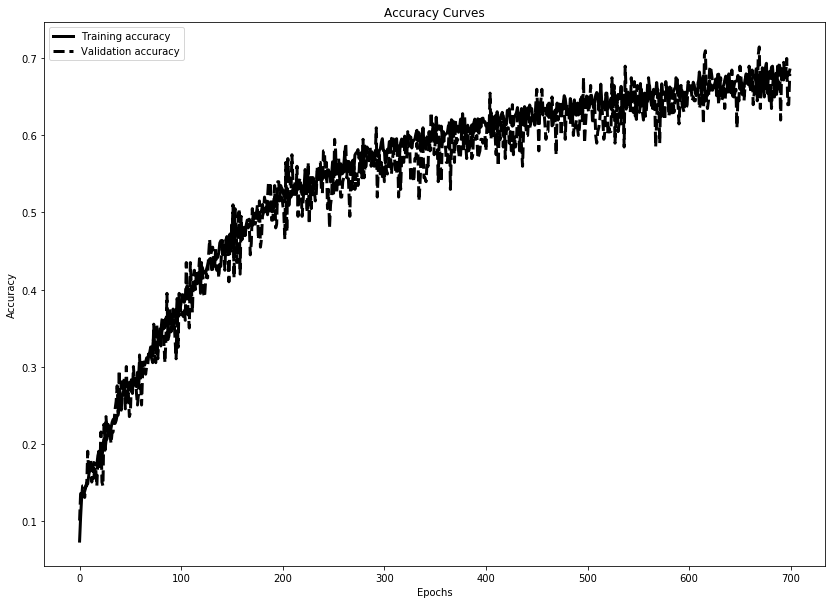

In [116]:
plt.figure(figsize = (14,10))
plt.plot(history.history['acc'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_acc'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


In [117]:
model_subject.evaluate(test_data, test_subject)

72/72 [==============================] - 0s 100us/sample - loss: 0.9207 - acc: 0.7917


[0.9206897417704264, 0.7916667]

In [84]:
predictions_subject = model_subject.predict(test_data)
predictions_position = model_position.predict(test_data)

predictions_subject = predictions_subject.argmax(axis=-1)
predictions_position = predictions_position.argmax(axis=-1)

plt.figure(figsize=(20,10))

for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(predictions_subject[i-1]) + ' - ' + str(predictions_position[i-1])
    plt.imshow(test_data[i-1].reshape(64, 32), cmap='gray')
    plt.xlabel(label)

test_labels = df.iloc[test_split:, num_col-2:num_col]
test_labels.head(10)


ValueError: Error when checking input: expected dense_48_input to have shape (9,) but got array with shape (3,)

In [118]:
import pickle
#save model and architecture to single file
model_subject.save("model_subject_2.h5")
model_position.save("model_position_2.h5")

#with open('test.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
 #   pickle.dump([test_data, test_subject, test_position], f)